In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import product
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

### Read Data and Split into test and train

In [2]:
data = pd.read_csv('../Finalized Data/final_with_doc.csv')

In [16]:
data.shape

(35232, 421)

In [83]:
data.head()

,File,elect,military,APD,Prof,female,CC,SC-AJ,SC,SC-AJ & SC,...,Race/Ethnicity_OTHER,Race/Ethnicity_WHITE,Race/Ethnicity_WHITE/HISPANIC,Sex_FEMALE,Sex_MALE,Status_DISCHARGED,Status_IN CUSTODY,Status_OUT TO COURT,Status_RELEASED,Status_TEMP RELEASE
0,2009_08295.htm.txt,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009_08317.htm.txt,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010_03986.htm.txt,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010_08289.htm.txt,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011_00826.htm.txt,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
sum(data.Y[data.Y==1])/data.shape[0]

0.25689713896457766

In [4]:
data.drop(['FirstD_month_x', 'AppealD_month_x', 'File', 'Unanimous', 'days_jail_doc'],axis=1,inplace=True)

In [93]:
data.columns.values

array(['File', 'elect', 'military', 'APD', 'Prof', 'female', 'CC', 'SC-AJ',
       'SC', 'SC-AJ & SC', 'start year', 'nycourts', '1976', '1980',
       '1981', '1984', '1985', '1986', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', 'retired', 'arrested', 'lost-reelection', 'died', 'left',
       'appointed-to-other-depart', 'contested',
       'judge_law_school_missing', 'judge_elect_missing',
       'judge_military_missing', 'judge_APD_missing', 'judge_info_missing',
       'judge_Prof_missing', 'judge_CC_missing', 'judge_SC-AJ_missing',
       'judge_SC_missing', 'judge_SC-AJ & SC_missing',
       'judge_startyear_missing', 'judge_female_missing', 'da_female',
       'da_black', 'da_2003', 'da_2004', 'da_2005', 'da_2006', 'da_2007',
       'da_2008', 'da_2009', 'da_2010', 'da

In [5]:
y = data.pop('Y')

In [6]:
X = data

In [211]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(X.dtypes)

elect                                                                   int64
military                                                                int64
APD                                                                     int64
Prof                                                                    int64
female                                                                  int64
CC                                                                      int64
SC-AJ                                                                   int64
SC                                                                      int64
SC-AJ & SC                                                              int64
start year                                                              int64
nycourts                                                                int64
1976                                                                    int64
1980                                                            

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

### Build initial model for testing

In [8]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate =0.1 )
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [9]:
forecast = model.predict(X_test)

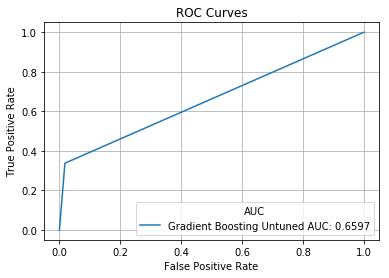

In [12]:
plot_roc(y_test, forecast,'Gradient Boosting Untuned')
plt.show()

In [11]:
def plot_roc(actual,forecast,name):
    
    #ROC
    fpr, tpr, thresholds = metrics.roc_curve(actual, forecast)

    #AUC
    aucc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = name + ' AUC: '+str(round(aucc, 4)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.grid(True)
    plt.legend(loc = 'lower right', title='AUC')

In [14]:
def show_most_informative_features(model, names, n=20):
    feature_names = names
    coefs = model.feature_importances_
    coefs_with_fns = sorted(zip(coefs, feature_names),reverse=True)
    top = coefs_with_fns[:n]
    for (coef_1, fn_1) in top:
        
        print("\t%.4f\t%-15s\t" % (coef_1, fn_1))

In [15]:
show_most_informative_features(model, X_train.columns.values)

	0.1207	Gap_days       	
	0.0921	judge_info_missing	
	0.0709	unanimous      	
	0.0693	appellant      	
	0.0452	a_Friday       	
	0.0339	start year     	
	0.0327	degree_crime_nan	
	0.0276	type_crime_nan 	
	0.0257	years_from_trial	
	0.0186	da_2011-contested	
	0.0157	a_Thursday     	
	0.0149	contested_nan  	
	0.0143	AppealD_2005   	
	0.0130	AppealD_month_y	
	0.0125	f_Monday       	
	0.0122	f_Sunday       	
	0.0122	AppealD_2004   	
	0.0108	SC-AJ          	
	0.0107	degree_crime_third	
	0.0106	defense__legal aid society	


### Fine Tuning

In [17]:
#Grid search
param_grid = [
    {'n_estimators' : [20,50,100,200],
     'learning_rate': [0.1, 0.05],
      'max_depth': [2,5],
      'min_samples_split': [5,10]}  
]

In [144]:
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, scoring= 'roc_auc')

In [145]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [141]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [18]:
best_gbt = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200)

In [19]:
best_gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [20]:
forecast = best_gbt.predict(X_test)

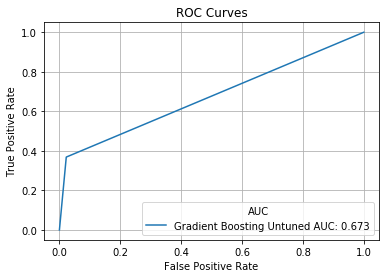

In [21]:
plot_roc(y_test, forecast,'Gradient Boosting Untuned')
plt.show()

In [22]:
show_most_informative_features(best_gbt, X_train.columns.values)

	0.0981	Gap_days       	
	0.0460	judge_info_missing	
	0.0376	start year     	
	0.0318	AppealD_month_y	
	0.0313	unanimous      	
	0.0274	years_from_trial	
	0.0197	FirstD_month_y 	
	0.0178	appellant      	
	0.0136	type_crime_nan 	
	0.0120	a_Friday       	
	0.0106	f_Monday       	
	0.0104	a_Thursday     	
	0.0102	f_Friday       	
	0.0096	degree_crime_nan	
	0.0087	f_Wednesday    	
	0.0078	a_Wednesday    	
	0.0078	f_Thursday     	
	0.0076	da_2013        	
	0.0075	AppealD_2004   	
	0.0074	da_judge_same_school	


In [ ]:
X_train.drop('')